# Plot figure 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import datetime as dt

import sys
sys.path.append('..')

from src.utils.utils import unpack_results

In [2]:
usrec = pd.read_csv("../data/raw/USREC.csv", index_col=0, parse_dates=True)

<Axes: xlabel='DATE'>

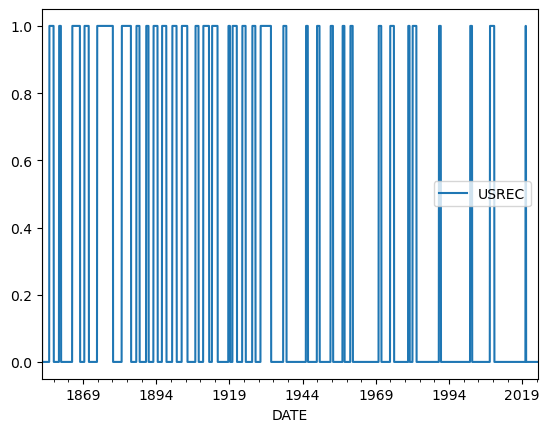

In [3]:
usrec.plot()

In [4]:
from_seed = 1
to_seed = 10
interim_data_path = "../data/interim/simulation_outputs_voc_solver"
preprocessed_data_path = "../data/processed/processed_data.csv"
save_path = "../reports/figures/curves_voc_solver"

with open(interim_data_path + "/config.json", 'r') as fp:
    config = json.load(fp)
    last_run_seed = config['last_run_seed']
    gamma = config['gamma']
    T_list = config['T_list']
    z_list = config['z_list']
    P_dict = config['P_dict']
    P_max = 12000
    delta_t = config['delta_t']

data = pd.read_csv(preprocessed_data_path, index_col=0, parse_dates=True)
dates = data.index[min(T_list):]

interim_data = pd.read_csv('../data/interim/formatted_goyal_data.csv', index_col=0, parse_dates=True)
interim_data = interim_data.loc[interim_data.index > dt.datetime(1927, 1, 1)]

# reminder: interim_data.R is UNSCALED EXCESS returns of S&P500 wrt Rfree
realized_R = interim_data.R
sigma_R = (realized_R**2).rolling(12).mean().apply(np.sqrt) 

run_params_unpacking = (T_list, P_dict, z_list) 

first_pass = True

for seed in range(from_seed, to_seed+1):
    print(seed)
    # load results
    b = np.load(f"{interim_data_path}/beta_norm_sq/{seed:04}beta_norm_sq.npy")
    r = np.load(f"{interim_data_path}/return_forecasts/{seed:04}return_forecasts.npy")

    # unpack results
    _, return_forecasts_df = unpack_results((b, r), run_params_unpacking, dates)

    if first_pass:
        return_forecasts_avg = return_forecasts_df
        first_pass = False
    else:
        return_forecasts_avg = return_forecasts_avg + return_forecasts_df

return_forecasts_avg

1
2
3
4
5
6
7
8
9
10


T                12                                                     \
P              1                                                         
z           0.001     0.010     0.100     1.000     10.000    100.000    
date                                                                     
1930-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
1931-01-31  1.220056  1.208357  1.102623  0.588062  0.103775  0.011237   
1931-02-28  1.267765  1.255945  1.148850  0.620293  0.110809  0.012027   
1931-03-31  2.315464  2.294214  2.101407  1.142363  0.205487  0.022335   
1931-04-30 -0.570265 -0.565053 -0.517745 -0.281976 -0.050824 -0.005526   
...              ...       ...       ...       ...       ...       ...   
2022-08-31 -0.576399 -0.570681 -0.519004 -0.269281 -0.044968 -0.004791   
2022-09-30 -0.173459 -0.174169 -0.179357 -0.164391 -0.048314 -0.005824   
2022-10-31  3.548840  3.518905  3.246226  1.850039  0.360712  0.040137   
2022-11-30 -1.527929 -1.512083 -1.369611 -0.699332 -0.116757 -0.012487   
2022-12-31  0.361144  0.355477  0.305709  0.106596  0.006379  0.000380   

T                                                   ...       120            \
P                        3                          ...     6000              
z           1000.000  0.001     0.010     0.100     ...  10.000    100.000    
date                                                ...                       
1930-12-31       NaN       NaN       NaN       NaN  ...       NaN       NaN   
1931-01-31  0.001133  0.254549  0.260743  0.293463  ...       NaN       NaN   
1931-02-28  0.001213  2.170035  2.134893  1.845899  ...       NaN       NaN   
1931-03-31  0.002253  2.287575  2.248898  1.931390  ...       NaN       NaN   
1931-04-30 -0.000558  0.978203  0.953857  0.766431  ...       NaN       NaN   
...              ...       ...       ...       ...  ...       ...       ...   
2022-08-31 -0.000482 -0.876982 -0.870666 -0.810033  ... -0.440142 -0.228187   
2022-09-30 -0.000594 -3.108606 -3.064924 -2.695350  ...  0.203639  0.075608   
2022-10-31  0.004060  6.953393  6.840631  5.956288  ...  0.226654  0.071289   
2022-11-30 -0.001257 -0.614617 -0.578131 -0.317788  ...  0.015323  0.013917   
2022-12-31  0.000035 -0.869151 -0.857610 -0.755680  ... -0.185760 -0.074185   

T                                                                       \
P                        12000                                           
z           1000.000  0.001     0.010     0.100     1.000     10.000     
date                                                                     
1930-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
1931-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
1931-02-28       NaN       NaN       NaN       NaN       NaN       NaN   
1931-03-31       NaN       NaN       NaN       NaN       NaN       NaN   
1931-04-30       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2022-08-31 -0.037336 -0.595511 -0.595455 -0.594895 -0.589404 -0.542036   
2022-09-30  0.009466  0.571739  0.571660  0.570862  0.563039  0.496798   
2022-10-31  0.007337  0.713570  0.713501  0.712812  0.705994  0.644628   
2022-11-30  0.002869  0.358818  0.358786  0.358460  0.355250  0.327232   
2022-12-31 -0.011326 -0.352739 -0.352723 -0.352556 -0.350855 -0.332264   

T                               
P                               
z           100.000   1000.000  
date                            
1930-12-31       NaN       NaN  
1931-01-31       NaN       NaN  
1931-02-28       NaN       NaN  
1931-03-31       NaN       NaN  
1931-04-30       NaN       NaN  
...              ...       ...  
2022-08-31 -0.312696 -0.061775  
2022-09-30  0.233794  0.035339  
2022-10-31  0.346044  0.062108  
2022-11-30  0.191771  0.039928  
2022-12-31 -0.203519 -0.042384  

[1105 rows x 315 columns]

In [5]:
# plot the average return forecasts for P=12000, z=1000
positions = {T: return_forecasts_avg.loc[:,(T, 12000, 1000)] for T in T_list}

In [6]:
positions_df = pd.DataFrame(positions)
positions_df

,12,60,120
date,,,
1930-12-31,NaN,NaN,NaN
1931-01-31,-0.094338,NaN,NaN
1931-02-28,0.061291,NaN,NaN
1931-03-31,0.064324,NaN,NaN
1931-04-30,0.042256,NaN,NaN
...,...,...,...
2022-08-31,-0.059722,-0.036139,-0.061775
2022-09-30,0.100113,0.078389,0.035339
2022-10-31,-0.177674,0.010073,0.062108


In [7]:
# smooth the positions
smoothed_positions_df = positions_df.rolling(12).mean()

In [10]:
smoothed_positions_df.dropna(inplace=True)

In [23]:
# rename columns so that they indicate T
smoothed_positions_df.columns = [f"T={T}" for T in T_list]
smoothed_positions_df

,T=12,T=60,T=120
date,,,
1940-12-31,0.495577,0.184061,0.099028
1941-01-31,0.539085,0.196466,0.103718
1941-02-28,0.135482,0.067997,0.035796
1941-03-31,0.102572,0.050338,0.026754
1941-04-30,0.043827,0.031488,0.019320
...,...,...,...
2022-08-31,-0.008624,-0.050919,-0.042675
2022-09-30,-0.038921,-0.049652,-0.043334
2022-10-31,-0.056562,-0.049624,-0.037484


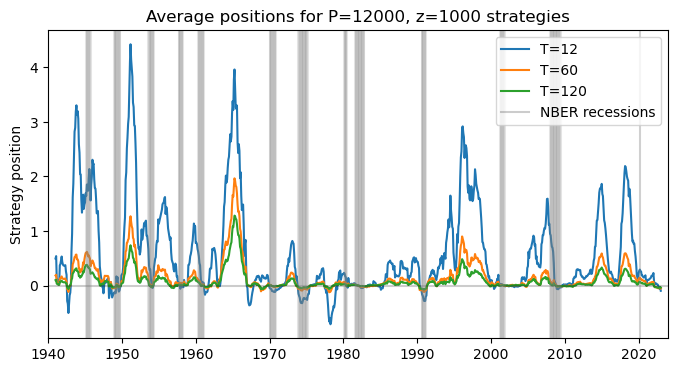

In [55]:

#smoothed_positions_df.plot()

# plot the average return forecasts for P=12000, z=1000
plt.figure(figsize=(8, 4))
plt.plot(smoothed_positions_df.index, smoothed_positions_df)
plt.title("Average positions for P=12000, z=1000 strategies")
# add vertical lines for recessions
plt.axhline(y=0, alpha=0.2, color='black', linestyle='-')

usrec = usrec.loc[usrec.index >= smoothed_positions_df.index[0]]

for i in range(len(usrec)):
    if usrec.iloc[i, 0] == 1:
        plt.axvline(x=usrec.index[i], alpha=0.2, color='gray', linestyle='-')


plt.ylabel("Strategy position")
#plt.legend(smoothed_positions_df.columns)

# trim the plot
plt.xlim(smoothed_positions_df.index[0] -  dt.timedelta(365*1),
 smoothed_positions_df.index[-1] + dt.timedelta(365*1))

# add to the legend an indicator for the gray stipes, label them as "recession"
legend_labels = smoothed_positions_df.columns.append(pd.Index(["NBER recessions"]))
plt.legend(legend_labels)

# save the plot, wide format
plt.savefig(f"{save_path}/return_forecasts_avg.png", dpi=300)